# 2-dimensional WF simulator

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
%matplotlib inline

In [180]:
from scipy.ndimage.filters import laplace
def SS_WF_sim(pop_size,mu,s,m,num_reps,num_gen,num_demes):
    #Pre-allocate and initialize 
    f = np.zeros((num_gen,num_reps,num_demes,num_demes))
    f[0] = 1/pop_size
    for j in range(num_gen-1):
        #Wright-Fisher diffusion w/Stepping Stone migration
        df = mu*(1-2*f[j])-s*f[j]*(1-f[j]) \
        +m*laplace(f[j])
        #bounds allele frequencies
        p = np.clip(a= f[j] + df ,a_min=0,a_max=1)
        #genetic drift sampling
        f[j+1]= np.random.binomial(pop_size,p)/pop_size
    return f

In [184]:
dims = (2,1)
f = np.zeros((num_gen,num_reps)+dims)
f.shape

(500, 1, 2, 1)

In [ ]:
out = "TEST"
params = (("N_%f_mu_%.e_"))

#### Testing figures for honors program background talk

In [104]:
N = 10**3
mu = 10**-5
s = 0
m = 0
num_reps = 1000
num_gen = 500
num_demes1 = 2 
num_demes2 = 2
p0 = 1/N

f = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes1,num_demes2,p0)
avg_f = np.mean(f,axis=(2,3))

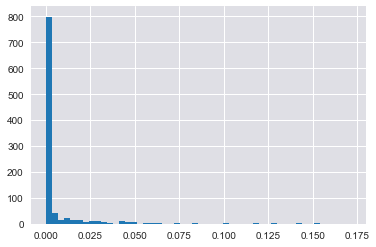

In [105]:
plt.hist(avg_f[-1],bins=50)
plt.show()

In [106]:
mu2 = 2*mu

f2 = SS_WF_sim(N,mu2,s,m,num_reps,num_gen,num_demes1,num_demes2,p0)
avg_f2 = np.mean(f2,axis=(2,3))

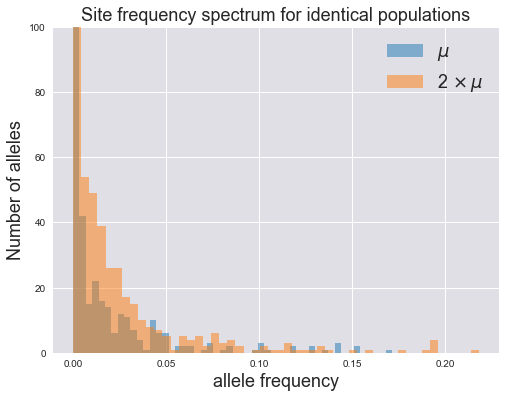

In [107]:
plt.figure(figsize=(8,6))
plt.hist(avg_f[-1],bins=50,alpha=0.5,label=r"$\mu$")
plt.hist(avg_f2[-1],bins=50,alpha=0.5,label=r"2 $\times\,\mu$")
plt.ylim(top=100)
plt.xlabel("allele frequency")
plt.ylabel("Number of alleles")
plt.legend(loc="upper right",prop={'size':18})
plt.title("Site frequency spectrum for identical populations")

plt.savefig("/Users/cporras/Desktop/SFS_sample")

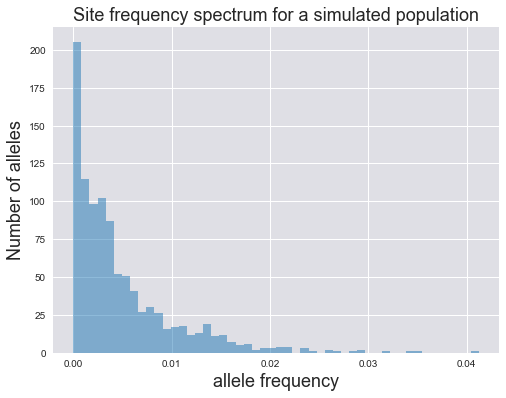

In [69]:
plt.figure(figsize=(8,6))
plt.hist(avg_f[-1],bins=50,alpha=0.5,label=r"$\mu$")
plt.xlabel("allele frequency")
plt.ylabel("Number of alleles")
# plt.legend(loc="upper right",prop={'size':18})
plt.title("Site frequency spectrum for a simulated population")

plt.savefig("/Users/cporras/Desktop/SFS_sample_sim")

### 2D sampling at equilibrium

In [3]:
from scipy.ndimage.filters import gaussian_filter

In [4]:
def eq_sampling(sigma,f): # give array of sigma values
    eq_f = f[-1] # choose equilibrium time
    # only need a single replicate
    eq_F_reps= np.zeros(tuple([len(sigma)]) + eq_f[0].shape)
    for s in sigma:
        eq_F_reps[s] = gaussian_filter(eq_f[0],sigma=sigma[s],mode = "wrap")
    return eq_F_reps


#### sample variance vs. sigma

In [32]:
N = 10**4
mu = 10**-5
s = 10**-3
m = 10**-1
num_reps = 1
num_gen = 10**3
num_demes1 = 50
num_demes2 = 50
p0 = 1/N

In [34]:
def plot_var_vs_sigma(f,num_demes):
    sigma = np.arange(num_demes)
    eq_F = eq_sampling(sigma,f)
    var = np.var(eq_F,axis=(1,2))
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.plot(sigma,var,label = "obs")
    ax1.plot(np.arange(num_demes),np.max(var)*1/((np.arange(num_demes)+1)**2),label = r"$\frac{1}{x^2}$")
    ax1.set_title(r"Sample $var$ vs. $\sigma$")
    ax1.legend()
    ax2.loglog(sigma,var,label = "$d_c=$"+str(np.round(np.sqrt(m/s),2)))
    ax2.loglog(np.arange(num_demes),np.max(var)*1/((np.arange(num_demes)+1)**2),label = r"$\frac{1}{x^2}$")
    ax2.set_title(r"loglog Sample $var$ vs. $\sigma$")
    ax2.legend()
    plt.show()
    

In [37]:
f = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes1,num_demes2,p0)

In [40]:
np.save("../../data/numpy_arrays/2D_SS_WF_freqs",f)

Text(33,0.5,'latitude')

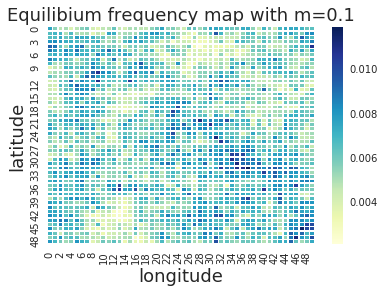

In [38]:
eq_f = f[-1]
vmax = np.max(eq_f)
sns.heatmap(eq_f[0],vmax = vmax,linewidths=.5,cmap='YlGnBu')
plt.title("Equilibium frequency map with m="+str(m))
plt.xlabel("longitude")
plt.ylabel("latitude")
# plt.savefig("/Users/cporras/Desktop/heatmap")

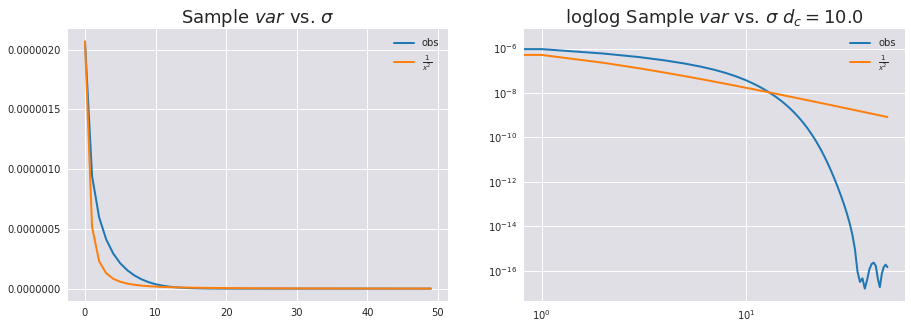

In [39]:
plot_var_vs_sigma(f,num_demes1)

### Spatial sampling with uncorrelated demes

In [41]:
N = 10**4
mu = 10**-5
s = 10**-3
m = 0
num_reps = 1
num_gen = 10**3
num_demes1 = 50
num_demes2 = 50
p0 = 1/N

In [42]:
f_0mig = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes1,num_demes2,p0)

In [43]:
np.save("../../data/numpy_arrays/2D_S_WF_0mig",f_0mig)

Text(33,0.5,'latitude')

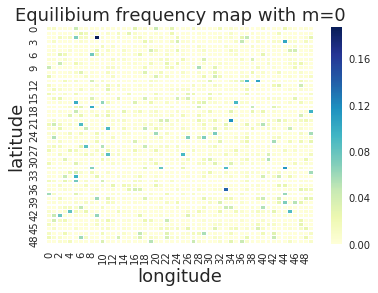

In [45]:
eq_f_0mig = f_0mig[-1]
vmax = np.max(eq_f_0mig)
sns.heatmap(eq_f_0mig[0],vmax = vmax,linewidths=.5,cmap='YlGnBu')
plt.title("Equilibium frequency map with m="+str(m))
plt.xlabel("longitude")
plt.ylabel("latitude")
# plt.savefig("/Users/cporras/Desktop/heatmap")

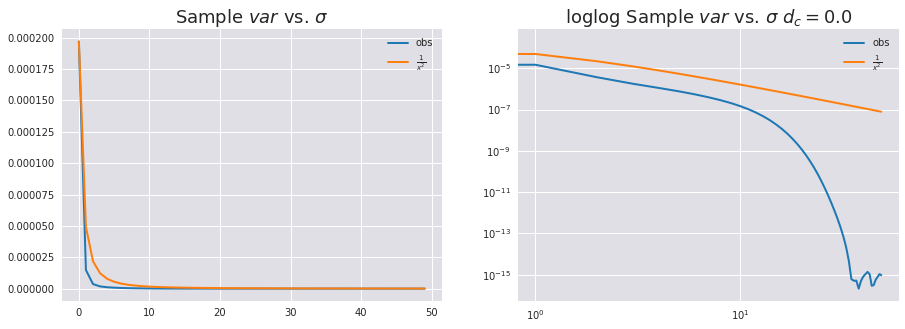

In [46]:
plot_var_vs_sigma(f_0mig,num_demes1)

In [54]:
np.round(np.sqrt(m_arr/s),2)

array([ 0.  , 10.  , 14.14, 17.32, 20.  ])

In [52]:
m_arr

array([0. , 0.1, 0.2, 0.3, 0.4])

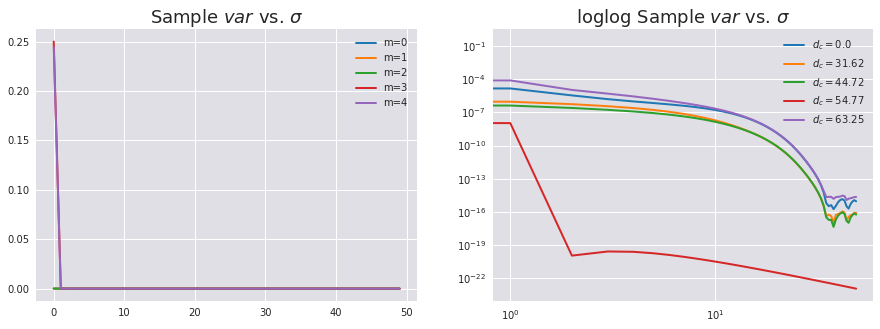

In [51]:
N = 10**4
mu = 10**-5
s = 10**-3
num_m = 5
num_reps = 1
num_gen = 10**3
num_demes1 = 50
num_demes2 = 50
p0 = 1/N

sigma = np.arange(num_demes1)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

m_arr = np.arange(num_m)/10

for m in range(len(m_arr)):
    f_marr= SS_WF_sim(N,mu,s,m_arr[m],num_reps,num_gen,num_demes1,num_demes2,p0)
    eq_F = eq_sampling(sigma,f_marr)
    var = np.var(eq_F,axis=(1,2))

    ax1.plot(sigma,var,label = "m="+str(m_arr[m]))
    
    ax2.loglog(sigma,var,label = "$d_c=$"+str(np.round(np.sqrt(m_arr[m]/s),2)))

ax1.legend()
ax1.set_title(r"Sample $var$ vs. $\sigma$")
ax2.legend()
ax2.set_title(r"loglog Sample $var$ vs. $\sigma$")
plt.show()

### Example figures of 2D sim

In [348]:
N = 10000
mu = 10**-5
s = 10**-2
m = 10**-1
num_reps = 1
num_gen = 1000
num_demes1 = 50
num_demes2 = 50
p0 = 1/N

In [349]:
f_1 = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes1,num_demes2,p0)

In [350]:
eq_f1 = f_1[-1]

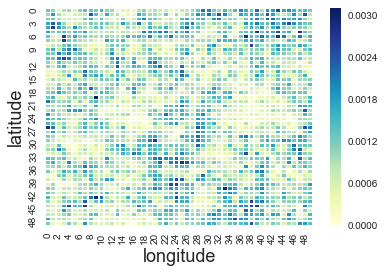

In [405]:
vmax = np.max(eq_f1)
sns.heatmap(eq_f1[0],vmax = vmax,linewidths=.5,cmap='YlGnBu')
plt.xlabel("longitude")
plt.ylabel("latitude")
# plt.savefig("/Users/cporras/Desktop/heatmap")

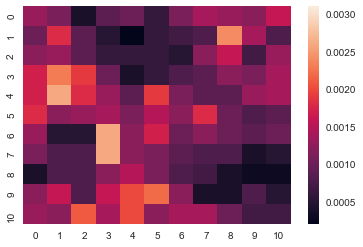

In [354]:
sns.heatmap(eq_f1[0,0:11,0:11],vmax=vmax)

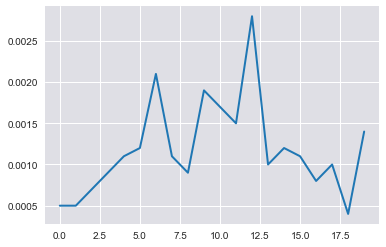

In [358]:
plt.plot(eq_f1[0,15:35,0])

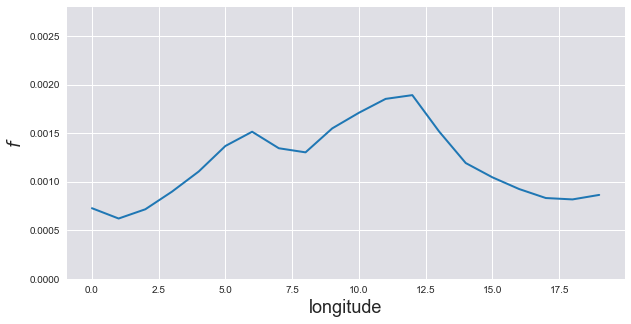

In [402]:
plt.figure(figsize=(10,5))
plt.plot(gaussian_filter1d(eq_f1[0,15:35,0],sigma=1,mode="wrap"))
plt.ylim(0,np.max(eq_f1[0,15:35,0]))
plt.xlabel("longitude")
plt.ylabel(r"$f$")
plt.savefig("/Users/cporras/Desktop/sample1")

(0, 0.0028)

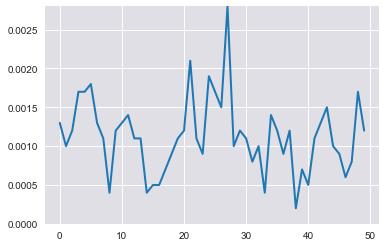

In [382]:
plt.plot(eq_f1[0,:,0])
plt.ylim(0,np.max(eq_f1[0,15:35,0]))

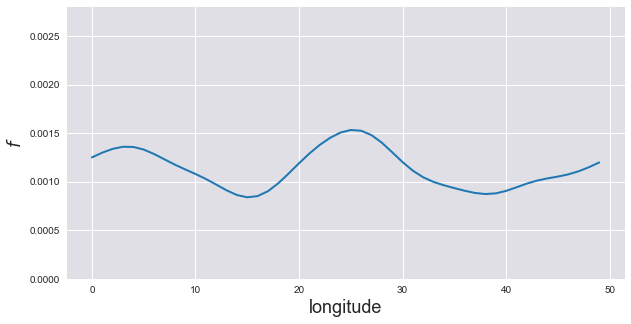

In [412]:
plt.figure(figsize=(10,5))
plt.plot(gaussian_filter1d(eq_f1[0,:,0],sigma=3,mode="wrap"))
plt.ylim(0,np.max(eq_f1[0,15:35,0]))
plt.yticks(fontsize=10)
plt.xlabel("longitude")
plt.ylabel(r"$f$")
plt.savefig("/Users/cporras/Desktop/sample2")

### Sample heatmaps show diffusion of frequencies as $\sigma$ increases

#### $\sigma = 1$

In [166]:
sigma = 1
eq_F = gaussian_filter(eq_f[0],sigma=sigma,mode = "wrap")

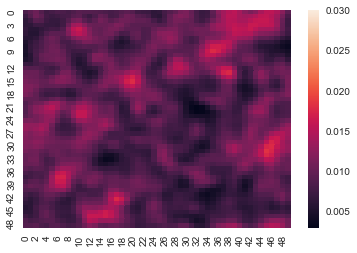

In [167]:
sns.heatmap(eq_F,vmax=vmax)

In [169]:
np.median(eq_F)

0.00922056039106458

#### $\sigma = 2$

In [170]:
sigma = 2
eq_F = gaussian_filter(eq_f[0],sigma=sigma,mode = "wrap")

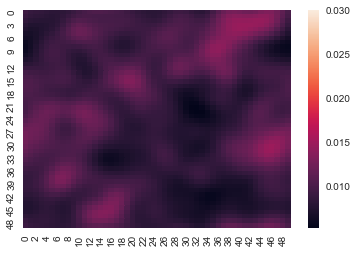

In [171]:
sns.heatmap(eq_F,vmax=vmax)

In [172]:
np.median(eq_F)

0.009287170861983714

#### $\sigma = 10$

In [174]:
sigma = 10
eq_F = gaussian_filter(eq_f[0],sigma=sigma,mode = "wrap")

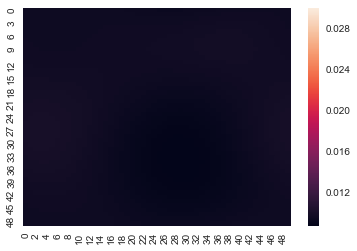

In [175]:
sns.heatmap(eq_F,vmax=vmax)

In [177]:
np.median(eq_F)

0.009524963578649622

#### $\sigma = 100$

In [178]:
sigma = 100
eq_F = gaussian_filter(eq_f[0],sigma=sigma,mode = "wrap")

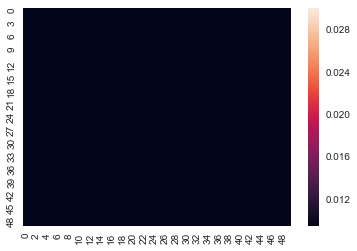

In [179]:
sns.heatmap(eq_F,vmax=vmax)

In [181]:
np.median(eq_F)

0.009459599958762867

In [182]:
eq_F.shape

(50, 50)

### Movie of 2d frequencies over time

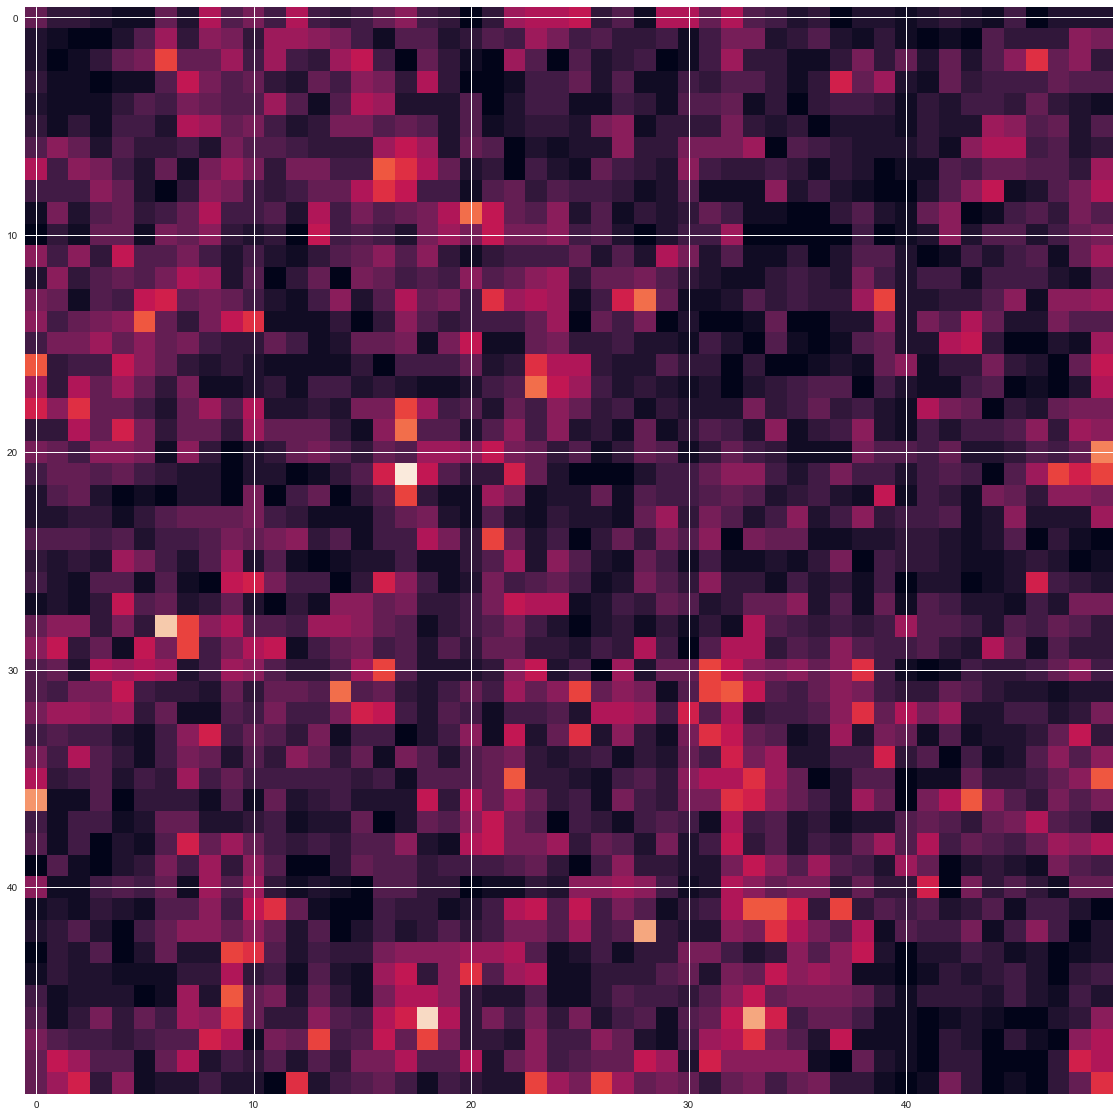

In [345]:
# plt.figure(figsize=(10,10))
# for i in range(50):
#     plt.imshow(f[i,0]) #go towards equilibrium
#     ID = format(i,"02d")
#     plt.savefig(f"/Users/cporras/Desktop/test/{ID}_heatmap2D_unsampled_N_{N}_mu_s_{mu/s}.png")